In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nome_file1 = "./richiesta_dati_gg_80749_parte1.csv"
nome_file2 = "./richiesta_dati_gg_80749_parte2.csv"
nome_file3 = "./richiesta_dati_gg_80749_parte3.csv"
nome_file4 = "./richiesta_dati_gg_80749_parte4.csv"

In [3]:
def estrazione_dati(nome_file, skip_header, skip_footer, usecols, delimiter, missing_value=""):
    dati = {}
    for chiave, valore in usecols.items():
        dati[chiave] = np.array([], dtype=eval(valore))
        
    with open(nome_file, "r") as file:
        for riga in file.readlines()[skip_header:-skip_footer]:
            dati_riga = riga[:-1].replace(" ", "").split(delimiter)
            
            if "" in dati_riga and missing_value=="":
                pass
            else:
                for chiave, valore in usecols.items():
                    if dati_riga[chiave] != "":
                        dati[chiave] = np.append(dati[chiave], eval(valore)(dati_riga[chiave]))
                    else:
                        if missing_value != "":
                            dati[chiave] = np.append(dati[chiave], eval(valore)(missing_value))
    return dati

In [4]:
dati_temperature_colle = estrazione_dati(nome_file1, 10, 1, {0:'str',1:'str',2:'float', 4:'float', 6:'str',7:'float'}, ",", "")
dati_temperature_diga = estrazione_dati(nome_file3, 10, 1, {0:'str',1:'str',2:'float', 4:'float', 6:'str',7:'float'}, ",", "")
dati_neve_colle = estrazione_dati(nome_file2, 10, 1, {0:'str',1:'float',2:'float'}, ",", "")
dati_neve_diga = estrazione_dati(nome_file4, 10, 1, {0:'str',1:'float',2:'float'}, ",", "")

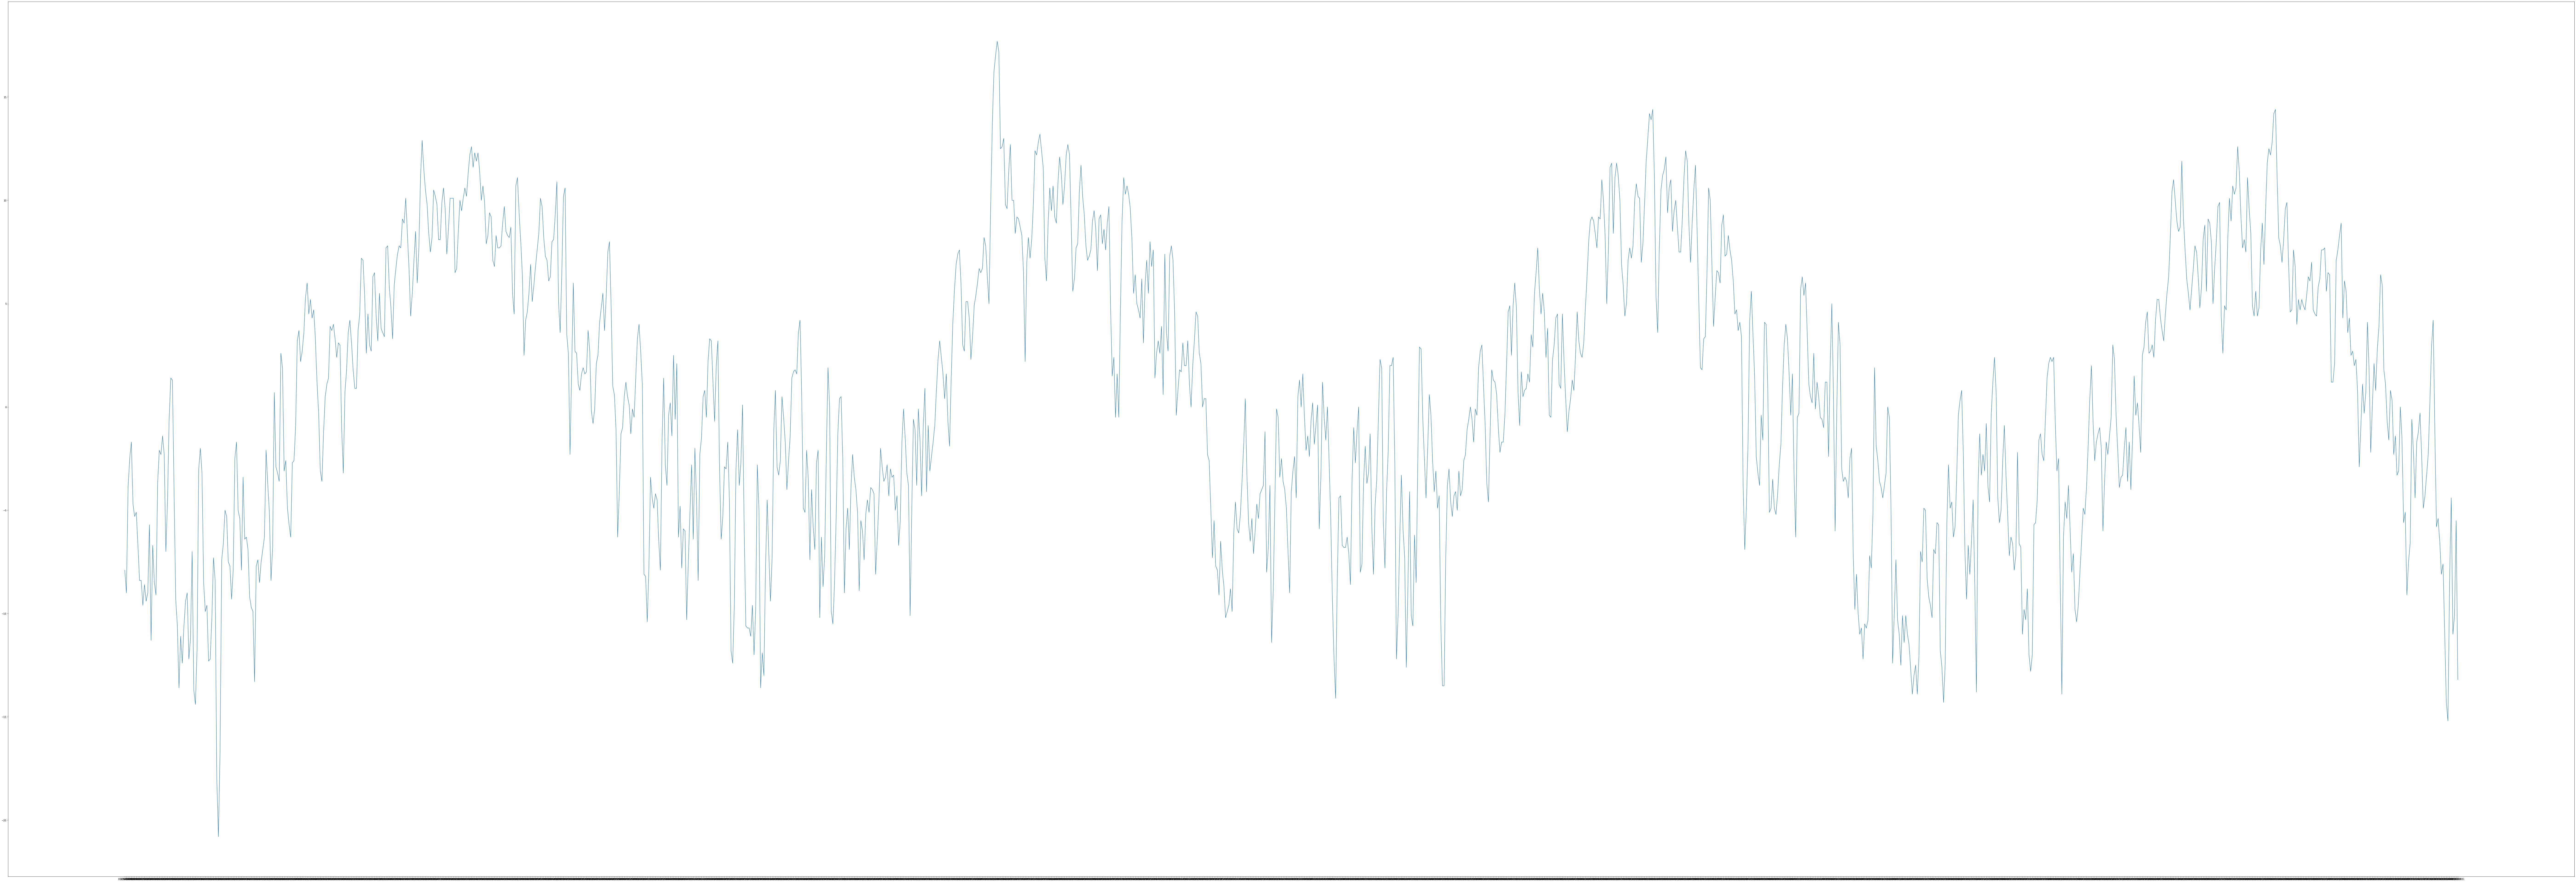

In [9]:
fig, ax = plt.subplots(figsize=(200,70))
ax.plot(dati_temperature_colle[0], dati_temperature_colle[4])
plt.show()

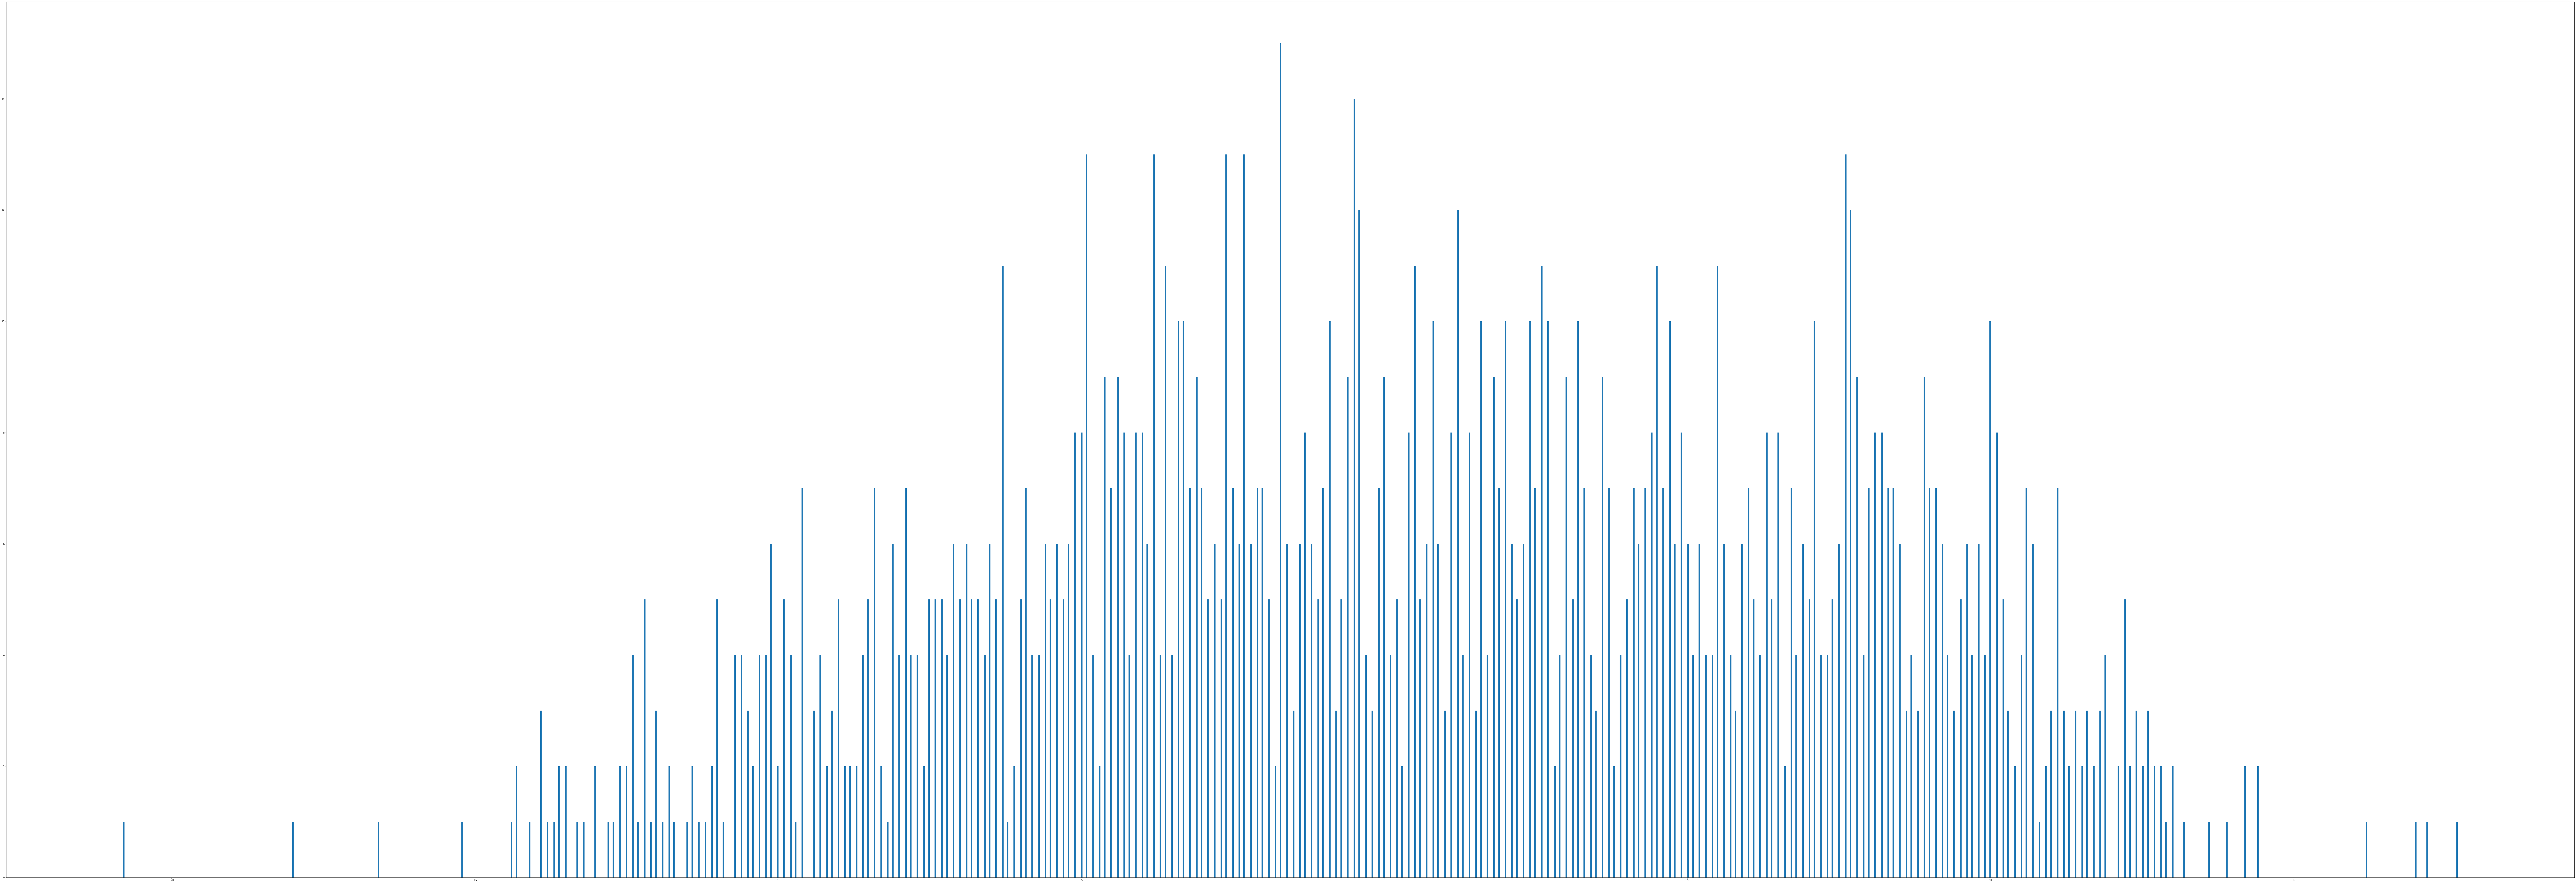

In [10]:
fig, ax = plt.subplots(figsize=(200,70))
ax.hist(dati_temperature_colle[4], bins=dati_temperature_colle[0].size)
plt.show()